In [ ]:
%cd ..

In [ ]:
!kaggle datasets download -d giovamata/airlinedelaycauses
!unzip airlinedelaycauses.zip

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from somnium.core import SOM
from somnium.visualization import plot_components, plot_bmus
from somnium.visualization import plot_umatrix

In [3]:
df = (pd.DataFrame({"weight": np.random.randn(10000)*8+75,
                    "height": np.random.randn(10000)*8+180})
      .assign(BMI=lambda d: 703*d.weight/(d.height**2),
              fat=lambda d: ((d.weight-75)/8)*2 + 23.5 +
              np.random.randn(10000)*0.5,
              random=np.random.randn(10000)
              ))

data = df.values
names = df.columns

In [4]:
df.head()

,weight,height,BMI,fat,random
0,64.261065,180.828934,1.381553,20.916810,0.131927
1,69.385788,183.429647,1.449729,22.693542,1.214362
2,75.194931,182.349033,1.589780,23.311751,-0.920859
3,88.451044,174.347537,2.045628,26.243437,0.183509
4,71.982372,180.337748,1.555995,23.056965,0.341996


E_Quantization = 0.3087092419790128
E_Topographic = 0.009800000000000031


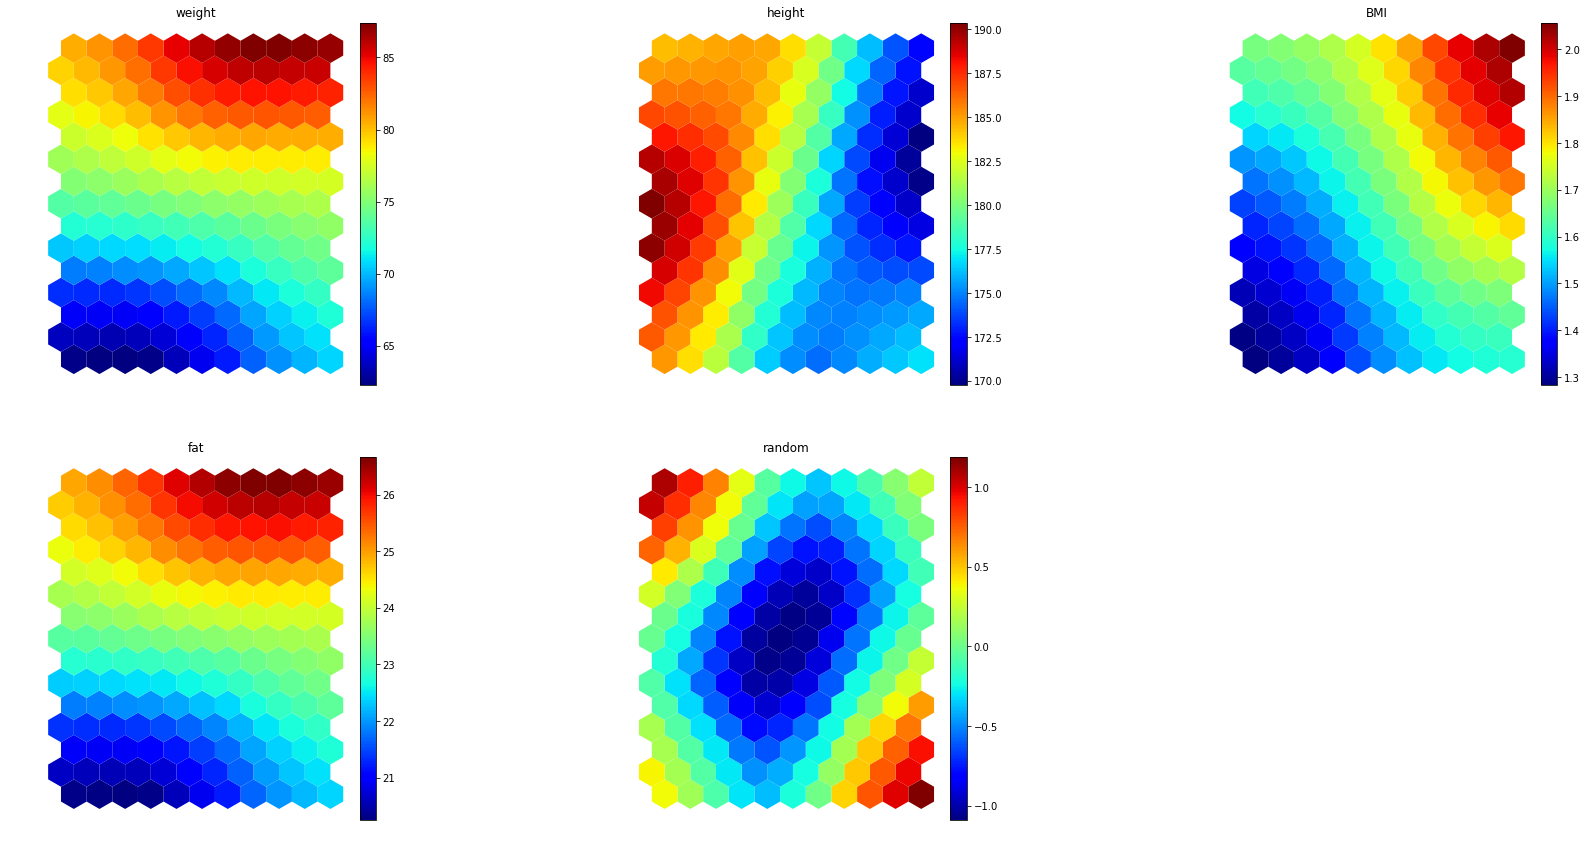

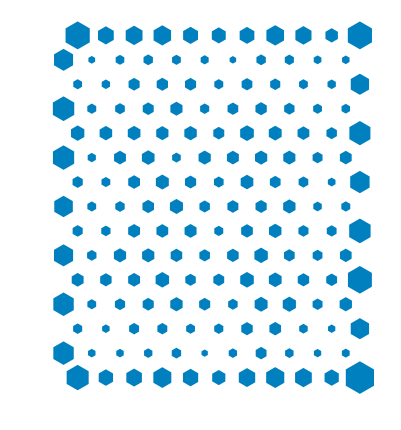

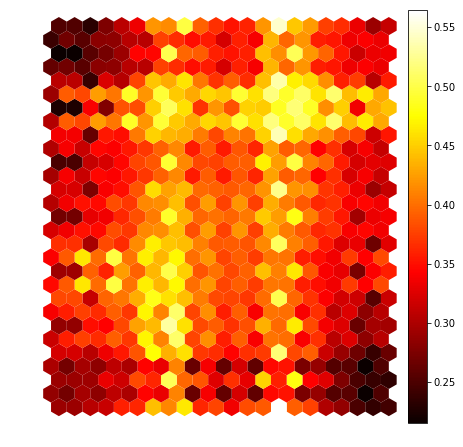

CPU times: user 10.1 s, sys: 294 ms, total: 10.4 s
Wall time: 6.05 s


In [5]:
%%time
model = SOM(lattice="hexa", distance_metric="euclidean", neighborhood="epanechicov", mapsize=[15, 11], n_jobs=1)

model.fit(data, 10, 30, 10)
model.fit(data, 30, 10, 4)
print("E_Quantization =", model.calculate_quantization_error())

print("E_Topographic =", model.calculate_topographic_error())

plot_components(model, data, names, figure_width=30, max_subplot_columns=3)
plot_bmus(model, figure_width=10)
plot_umatrix(model, colormap = plt.cm.hot, figure_width=10)

E_Quantization = 0.3227811738331184
E_Topographic = 0.0363


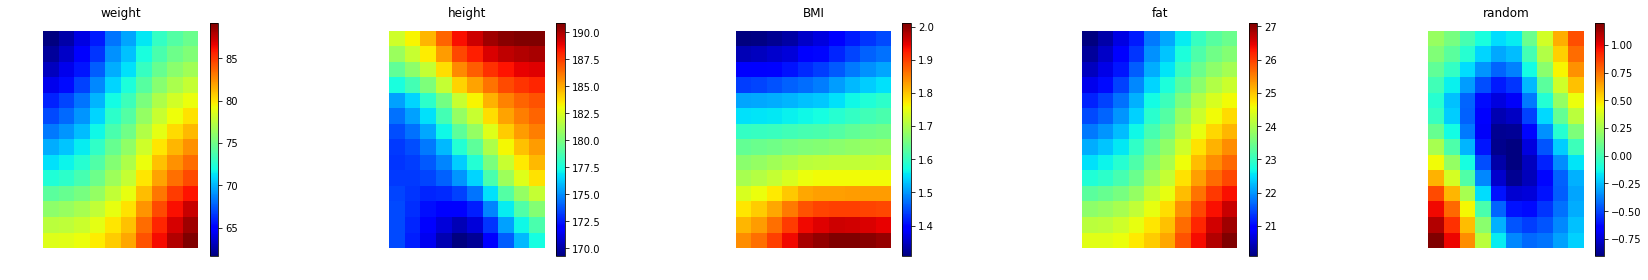

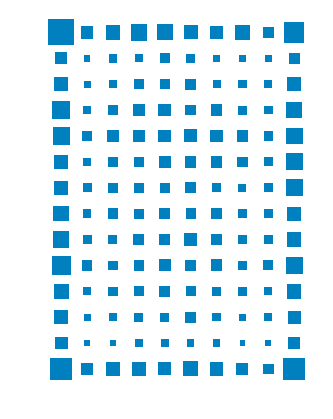

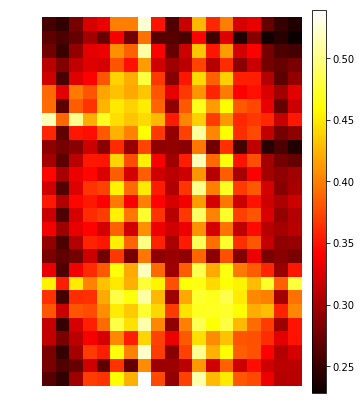

In [6]:
model = SOM(lattice="rect", distance_metric="euclidean", neighborhood="epanechicov", mapsize=[14, 10])

model.fit(data, 10, 30, 10)
model.fit(data, 10, 10, 4)
print("E_Quantization =", model.calculate_quantization_error())

print("E_Topographic =", model.calculate_topographic_error())

plot_components(model, data, names, figure_width=30, max_subplot_columns=5)
plot_bmus(model, figure_width=10)
plot_umatrix(model, colormap = plt.cm.hot, figure_width=10)